Mounted at /content/drive
ข้อมูลใน CSV file:
            Image  Steering  Left_Speed  Right_Speed
0  Image_0000.jpg       0.0          21           21
1  Image_0001.jpg       0.0         127          127
2  Image_0002.jpg       0.0         127          127
3  Image_0003.jpg       0.0         127          127
4  Image_0004.jpg       0.0         127          127

Columns in CSV: ['Image', 'Steering', 'Left_Speed', 'Right_Speed']

พบรูปภาพทั้งหมด 2540 รูป
แสดงตัวอย่าง 5 รูปแรก:


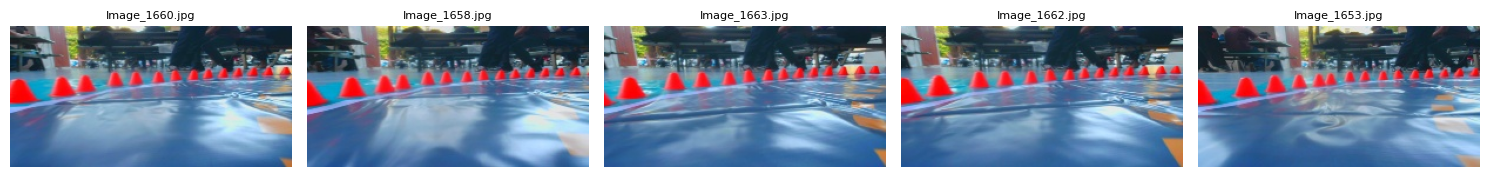

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# กำหนด path ของไฟล์และโฟลเดอร์
base_path = '/content/drive/MyDrive/log/lane'
csv_file = os.path.join(base_path, 'evening2.csv')
image_folder = os.path.join(base_path, 'evening2')

# โหลดข้อมูลจาก CSV
try:
    df = pd.read_csv(csv_file)
    print("ข้อมูลใน CSV file:")
    print(df.head())
    print("\nColumns in CSV:", df.columns.tolist())
except FileNotFoundError:
    print(f"ไม่พบไฟล์ CSV ที่ path: {csv_file}")
except Exception as e:
    print(f"เกิดข้อผิดพลาดในการอ่านไฟล์ CSV: {str(e)}")

# ตรวจสอบและแสดงรูปภาพจากโฟลเดอร์
def display_images(folder_path, num_images=5):
    try:
        # ตรวจสอบว่าโฟลเดอร์มีอยู่จริง
        if not os.path.exists(folder_path):
            print(f"ไม่พบโฟลเดอร์รูปภาพที่ path: {folder_path}")
            return

        # รับรายการไฟล์ภาพทั้งหมด
        image_files = [f for f in os.listdir(folder_path)
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

        if not image_files:
            print("ไม่พบไฟล์รูปภาพในโฟลเดอร์")
            return

        # แสดงจำนวนรูปภาพที่พบ
        print(f"\nพบรูปภาพทั้งหมด {len(image_files)} รูป")
        print(f"แสดงตัวอย่าง {min(num_images, len(image_files))} รูปแรก:")

        # สร้าง subplot สำหรับแสดงรูปภาพ
        fig = plt.figure(figsize=(15, 3*((num_images-1)//5 + 1)))
        for i, img_file in enumerate(image_files[:num_images]):
            img_path = os.path.join(folder_path, img_file)
            try:
                img = mpimg.imread(img_path)
                plt.subplot(((num_images-1)//5 + 1), 5, i+1)
                plt.imshow(img)
                plt.title(img_file, fontsize=8)
                plt.axis('off')
            except Exception as e:
                print(f"ไม่สามารถโหลดรูปภาพ {img_file}: {str(e)}")

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"เกิดข้อผิดพลาดในการแสดงรูปภาพ: {str(e)}")

# เรียกใช้ฟังก์ชันแสดงรูปภาพ
display_images(image_folder)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 56s 677ms/step - loss: 3147.5872 - mae: 82.5830 - val_loss: 3171.6089 - val_mae: 82.7750 - learning_rate: 1.0000e-04
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 44s 605ms/step - loss: 1384.6490 - mae: 54.0297 - val_loss: 2442.0671 - val_mae: 72.5064 - learning_rate: 1.0000e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 584ms/step - loss: 121.3398 - mae: 16.1703 - val_loss: 2082.4595 - val_mae: 66.8917 - learning_rate: 1.0000e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 570ms/step - loss: 111.8434 - mae: 15.5678 - val_loss: 1693.4371 - val_mae: 60.2110 - learning_rate: 1.0000e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 594ms/step - loss: 109.2141 - mae: 15.0097 - val_loss: 1256.8131 - val_mae: 51.6223 - learning_rate: 1.0000e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 564ms/step - loss: 103.1311 - mae: 14.6789 - val_loss: 924.4193 - val_mae: 44.0722 - learning_rate: 1.0000e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 582ms/step - loss: 108.0225 - mae

Model saved in SavedModel format at /content/drive/MyDrive/log/train2/train_model
Model saved in .h5 format at /content/drive/MyDrive/log/train2/train_model.h5


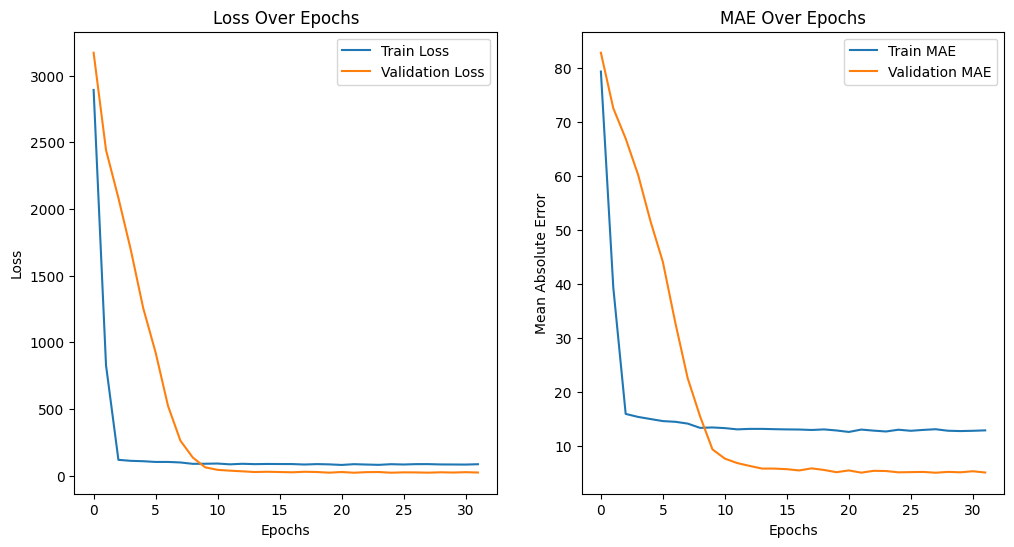

79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 146ms/step - loss: 24.0284 - mae: 5.0573
Test Loss: 25.135587692260742
Test MAE: 5.182888031005859
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted Steering, Left Speed, Right Speed: [[ -0.34448737 144.21541    102.8005    ]]
Predicted Image Path: /content/drive/MyDrive/log/lane/evening2/Image_1569.jpg


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, Input,
                                     DepthwiseConv2D, BatchNormalization, ReLU)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adamax, AdamW
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Parameters
IMG_SIZE = 224
BATCH_SIZE = 32  # Updated batch size
EPOCHS = 50
LEARNING_RATE = 0.0001

# Function to preprocess images
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

# Function to create a modified MobileNetV2 model
def create_custom_mobilenetv2_model():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
        include_top=False,
        weights="imagenet"
    )
    base_model.trainable = True

    for layer in base_model.layers[:-20]:
        layer.trainable = False

    x = base_model.output
    x = DepthwiseConv2D(kernel_size=(3, 3), padding="same", depth_multiplier=1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = GlobalAveragePooling2D()(x)

    # Adjusting layers and regularization
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.005))(x)  # Increased number of units
    x = Dropout(0.3)(x)  # Increased dropout rate
    x = Dense(128, activation='relu')(x)  # Increased number of units
    x = Dropout(0.3)(x)  # Increased dropout rate

    output = Dense(3, activation='linear')(x)
    model = Model(inputs=base_model.input, outputs=output)

    return model

# Weighted loss function
def weighted_loss(y_true, y_pred):
    steering_loss = tf.reduce_mean(tf.abs(y_true[:, 0] - y_pred[:, 0]))
    left_speed_loss = tf.reduce_mean(tf.square(y_true[:, 1] - y_pred[:, 1]))
    right_speed_loss = tf.reduce_mean(tf.square(y_true[:, 2] - y_pred[:, 2]))
    return steering_loss + 0.1 * left_speed_loss + 0.1 * right_speed_loss

# Data generator function with updated augmentation
def create_data_generator(image_paths, labels, batch_size, augment=False):
    datagen = ImageDataGenerator(
        rotation_range=10,  # Increased rotation range
        width_shift_range=0.2,  # Increased horizontal shift
        height_shift_range=0.2,  # Increased vertical shift
        brightness_range=[0.6, 1.4],  # Increased brightness range
        zoom_range=0.2,  # Increased zoom range
        horizontal_flip=True,  # Enable horizontal flip
        fill_mode="nearest"
    ) if augment else ImageDataGenerator()

    while True:
        indices = np.random.permutation(len(image_paths))
        for start_idx in range(0, len(image_paths), batch_size):
            end_idx = min(start_idx + batch_size, len(image_paths))
            batch_indices = indices[start_idx:end_idx]
            batch_images = np.array([load_and_preprocess_image(image_paths[i]) for i in batch_indices])
            batch_labels = labels[batch_indices]
            yield datagen.flow(batch_images, batch_labels, batch_size=len(batch_images), shuffle=False).__next__()

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.title('MAE Over Epochs')
    plt.legend()

    plt.show()

# Function to train the model
def train_model():
    csv_path = '/content/drive/MyDrive/log/lane/evening2.csv'
    image_folder = '/content/drive/MyDrive/log/lane/evening2'
    df = pd.read_csv(csv_path)

    image_paths = [os.path.join(image_folder, img_name) for img_name in df['Image']]
    labels = df[['Steering', 'Left_Speed', 'Right_Speed']].values

    train_paths, val_paths, train_labels, val_labels = train_test_split(
        image_paths, labels, test_size=0.2, random_state=42
    )

    model = create_custom_mobilenetv2_model()

    # Using AdamW or Adamax optimizer
    optimizer = AdamW(learning_rate=LEARNING_RATE)  # Or use Adamax(learning_rate=LEARNING_RATE)
    model.compile(optimizer=optimizer, loss=weighted_loss, metrics=['mae'])

    train_gen = create_data_generator(train_paths, train_labels, BATCH_SIZE, augment=True)
    val_gen = create_data_generator(val_paths, val_labels, BATCH_SIZE, augment=False)

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: LEARNING_RATE * 0.1**(epoch // 10))
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    steps_per_epoch = len(train_paths) // BATCH_SIZE
    validation_steps = len(val_paths) // BATCH_SIZE

    history = model.fit(
        train_gen,
        steps_per_epoch=steps_per_epoch,
        validation_data=val_gen,
        validation_steps=validation_steps,
        epochs=EPOCHS,
        callbacks=[lr_schedule, early_stopping],
        verbose=1
    )

    # Save the Model in SavedModel format
    saved_model_dir = '/content/drive/MyDrive/log/train2/train_model'
    tf.saved_model.save(model, saved_model_dir)
    print(f"Model saved in SavedModel format at {saved_model_dir}")

    h5_model_path = '/content/drive/MyDrive/log/train2/train_model.h5'
    model.save(h5_model_path)
    print(f"Model saved in .h5 format at {h5_model_path}")

    plot_training_history(history)

    # Model Evaluation after training
    def evaluate_model(model, test_paths, test_labels):
        test_gen = create_data_generator(test_paths, test_labels, BATCH_SIZE, augment=False)
        test_loss, test_mae = model.evaluate(test_gen, steps=len(test_paths) // BATCH_SIZE)
        print(f"Test Loss: {test_loss}")
        print(f"Test MAE: {test_mae}")

    # Path to test dataset (update as needed)
    csv_test_path = '/content/drive/MyDrive/log/lane/evening2.csv'  # Path to your test CSV
    image_folder_test = '/content/drive/MyDrive/log/lane/evening2'  # Path to your test images
    df_test = pd.read_csv(csv_test_path)

    test_paths = [os.path.join(image_folder_test, img_name) for img_name in df_test['Image']]
    test_labels = df_test[['Steering', 'Left_Speed', 'Right_Speed']].values

    evaluate_model(model, test_paths, test_labels)

    # Example prediction with random image from test set
    def predict_using_model(model, test_paths):
        # Randomly select a test image
        test_image_path = np.random.choice(test_paths)
        img = load_and_preprocess_image(test_image_path)

        # Predict using the model
        prediction = model.predict(np.expand_dims(img, axis=0))
        print(f"Predicted Steering, Left Speed, Right Speed: {prediction}")
        print(f"Predicted Image Path: {test_image_path}")

    # Call the function with the test paths
    predict_using_model(model, test_paths)

# Train the model
train_model()


Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - loss: 97.4497 - mae: 13.9062
Epoch 1: val_loss improved from inf to 17.43111, saving model to /content/drive/MyDrive/log/fine_tuned_model.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 748s 11s/step - loss: 97.3189 - mae: 13.8966 - val_loss: 17.4311 - val_mae: 4.4401 - learning_rate: 1.0000e-05
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - loss: 80.4644 - mae: 12.8027
Epoch 2: val_loss did not improve from 17.43111
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 639ms/step - loss: 80.5303 - mae: 12.8063 - val_loss: 18.8334 - val_mae: 4.6817 - learning_rate: 1.0000e-05


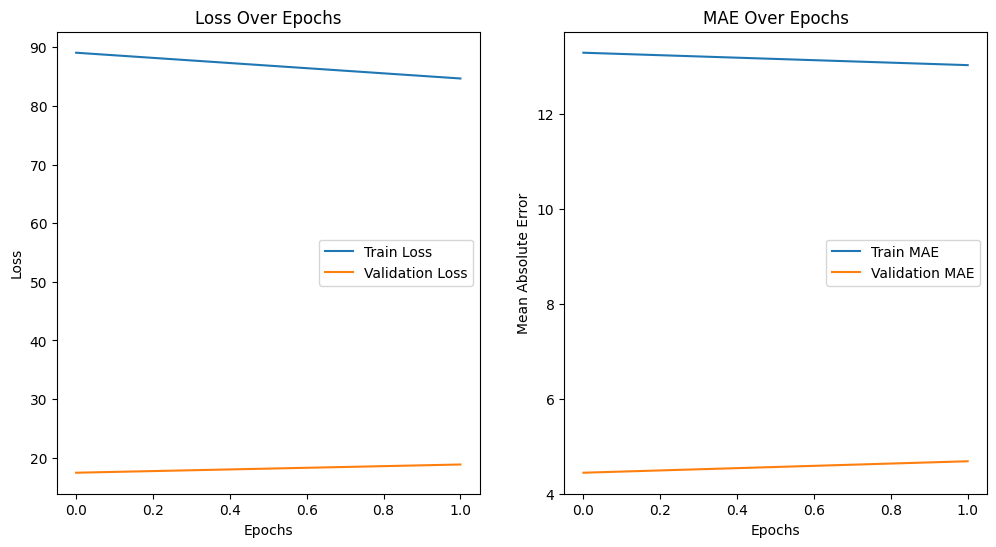

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import (GlobalAveragePooling2D, Dense, Dropout, Input,
                                     DepthwiseConv2D, BatchNormalization, ReLU)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Parameters
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 2
LEARNING_RATE = 1e-5

# Function to preprocess images
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = img_to_array(img)
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)
    return img_array

# Custom loss function
def weighted_loss(y_true, y_pred):
    steering_loss = tf.reduce_mean(tf.abs(y_true[:, 0] - y_pred[:, 0]))
    left_speed_loss = tf.reduce_mean(tf.square(y_true[:, 1] - y_pred[:, 1]))
    right_speed_loss = tf.reduce_mean(tf.square(y_true[:, 2] - y_pred[:, 2]))
    return steering_loss + 0.1 * left_speed_loss + 0.1 * right_speed_loss

# Data generator function with augmentation
def create_data_generator(image_paths, labels, batch_size, augment=False):
    datagen = ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        brightness_range=[0.4, 1.6],  # Adjusted for varying lighting conditions
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    ) if augment else ImageDataGenerator()

    while True:
        indices = np.random.permutation(len(image_paths))
        for start_idx in range(0, len(image_paths), batch_size):
            end_idx = min(start_idx + batch_size, len(image_paths))
            batch_indices = indices[start_idx:end_idx]
            batch_images = np.array([load_and_preprocess_image(image_paths[i]) for i in batch_indices])
            batch_labels = labels[batch_indices]
            yield datagen.flow(batch_images, batch_labels, batch_size=len(batch_images), shuffle=False).__next__()

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.title('MAE Over Epochs')
    plt.legend()

    plt.show()

# Fine-tune the model
def fine_tune_model(pretrained_model_path, fine_tune_csv, fine_tune_image_folder, output_model_path):
    # Load pre-trained model
    model = tf.keras.models.load_model(
        pretrained_model_path,
        custom_objects={'weighted_loss': weighted_loss}  # Load with custom loss
    )

    # Unfreeze the last few layers for fine-tuning
    for layer in model.layers[:-10]:
        layer.trainable = True

    # Compile the model with a lower learning rate for fine-tuning
    optimizer = AdamW(learning_rate=LEARNING_RATE)
    model.compile(optimizer=optimizer, loss=weighted_loss, metrics=['mae'])

    # Load the fine-tune dataset
    fine_tune_df = pd.read_csv(fine_tune_csv)
    fine_tune_paths = [os.path.join(fine_tune_image_folder, img_name) for img_name in fine_tune_df['Image']]
    fine_tune_labels = fine_tune_df[['Steering', 'Left_Speed', 'Right_Speed']].values

    # Split dataset into training and validation sets
    train_paths, val_paths, train_labels, val_labels = train_test_split(
        fine_tune_paths, fine_tune_labels, test_size=0.2, random_state=42
    )

    # Create data generators
    train_gen = create_data_generator(train_paths, train_labels, BATCH_SIZE, augment=True)
    val_gen = create_data_generator(val_paths, val_labels, BATCH_SIZE, augment=False)

    # Callbacks
    checkpoint = ModelCheckpoint(
        filepath=output_model_path,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=False,
        verbose=1
    )
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    lr_schedule = LearningRateScheduler(lambda epoch: LEARNING_RATE * 0.5**(epoch // 5))

    # Fine-tune the model
    history = model.fit(
        train_gen,
        steps_per_epoch=len(train_paths) // BATCH_SIZE,
        validation_data=val_gen,
        validation_steps=len(val_paths) // BATCH_SIZE,
        epochs=EPOCHS,
        callbacks=[checkpoint, early_stopping, lr_schedule],
        verbose=1
    )

    # Plot training history
    plot_training_history(history)

    return model

# Paths for pre-trained model, fine-tune dataset, and output model
pretrained_model_path = '/content/drive/MyDrive/log/train2/train_model.h5'
fine_tune_csv = '/content/drive/MyDrive/log/lane/evening1.csv'
fine_tune_image_folder = '/content/drive/MyDrive/log/lane/evening1'
output_model_path = '/content/drive/MyDrive/log/fine_tuned_model.keras'  # สำหรับ ModelCheckpoint

# Fine-tune the model
fine_tuned_model = fine_tune_model(pretrained_model_path, fine_tune_csv, fine_tune_image_folder, output_model_path)

# Save the fine-tuned model as .h5 file
fine_tuned_model.save('/content/drive/MyDrive/log/fine_tuned_model.h5')  # บันทึกเป็น .h5


In [ ]:
from tensorflow.keras.models import loada_model
from tensorflow.keras.layers import DepthwiseConv2D
import tensorflow as tf

# โหลดโมเดลที่บันทึกไว้ พร้อมระบุ custom_objects สำหรับการใช้ DepthwiseConv2D และ weighted_loss
model = load_model(
    '/content/drive/MyDrive/log/train2/final_model_with_depthwise.h5',
    custom_objects={'DepthwiseConv2D': DepthwiseConv2D, 'weighted_loss': weighted_loss}
)

# ใช้งานโมเดลต่อไป
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,448,325 (9.34 MB)

 Trainable params: 1,393,859 (5.32 MB)

 Non-trainable params: 1,054,464 (4.02 MB)

 Optimizer params: 2 (12.00 B)

In [ ]:
for layer in model.layers:
    print(f"Layer: {layer.name}, Trainable: {layer.trainable}")

Layer: input_layer_2, Trainable: True
Layer: Conv1, Trainable: False
Layer: bn_Conv1, Trainable: False
Layer: Conv1_relu, Trainable: False
Layer: expanded_conv_depthwise, Trainable: False
Layer: expanded_conv_depthwise_BN, Trainable: False
Layer: expanded_conv_depthwise_relu, Trainable: False
Layer: expanded_conv_project, Trainable: False
Layer: expanded_conv_project_BN, Trainable: False
Layer: block_1_expand, Trainable: False
Layer: block_1_expand_BN, Trainable: False
Layer: block_1_expand_relu, Trainable: False
Layer: block_1_pad, Trainable: False
Layer: block_1_depthwise, Trainable: False
Layer: block_1_depthwise_BN, Trainable: False
Layer: block_1_depthwise_relu, Trainable: False
Layer: block_1_project, Trainable: False
Layer: block_1_project_BN, Trainable: False
Layer: block_2_expand, Trainable: False
Layer: block_2_expand_BN, Trainable: False
Layer: block_2_expand_relu, Trainable: False
Layer: block_2_depthwise, Trainable: False
Layer: block_2_depthwise_BN, Trainable: False
Layer

In [ ]:
!pip install tensorflow-model-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 8.5 MB/s eta 0:00:00
